In [3]:
!pip install dask[dataframe] matplotlib seaborn pandas


In [6]:
import os

os.makedirs("data/sample", exist_ok=True)

with open("data/sample/sample_sales.csv", "w") as f:
    f.write("""order_id,date,category,product,sales,quantity
1,2025-01-01,Electronics,Phone,250,1
2,2025-01-02,Clothing,Shirt,40,2
3,2025-01-03,Electronics,Laptop,1200,1
4,2025-01-04,Home,Vacuum,150,1
5,2025-01-05,Clothing,Jeans,60,1
""")

print("Sample dataset created at data/sample/sample_sales.csv")


Sample dataset created at data/sample/sample_sales.csv


Schema:
 order_id              int64
date        string[pyarrow]
category    string[pyarrow]
product     string[pyarrow]
sales                 int64
quantity              int64
dtype: object

First few rows:
    order_id        date     category product  sales  quantity
0         1  2025-01-01  Electronics   Phone    250         1
1         2  2025-01-02     Clothing   Shirt     40         2
2         3  2025-01-03  Electronics  Laptop   1200         1
3         4  2025-01-04         Home  Vacuum    150         1
4         5  2025-01-05     Clothing   Jeans     60         1

Total sales by category:
 category
Clothing        100
Electronics    1450
Home            150
Name: sales, dtype: int64


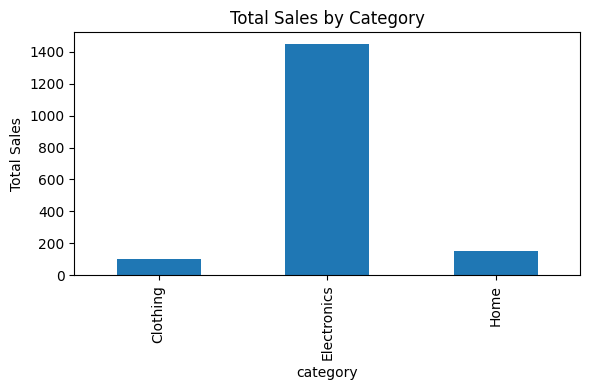

Results saved in outputs/ folder


In [7]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Make sure outputs folder exists
os.makedirs("outputs", exist_ok=True)

# Load sample data (or large dataset if provided later)
df = dd.read_csv("data/sample/sample_sales.csv")

print("Schema:\n", df.dtypes)
print("\nFirst few rows:\n", df.head())

# Aggregation: total sales by category
result = df.groupby("category")["sales"].sum().compute()
print("\nTotal sales by category:\n", result)

# Save to CSV
result.to_csv("outputs/dask_category_sales.csv", index=True)

# Plot
plt.figure(figsize=(6,4))
result.plot(kind="bar")
plt.title("Total Sales by Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("outputs/dask_total_sales.png")
plt.show()

print("Results saved in outputs/ folder")


In [8]:
print("Unique identifier: TASK1-JahnviKhurana-20050430")


Unique identifier: TASK1-JahnviKhurana-20050430
